## Load Dataset

In [2]:
import pandas as pd

# Re-read the dataset with UTF-8 encoding (or another encoding like 'latin1' if necessary)
df = pd.read_csv('Datasets/merged_business_population.csv', encoding='utf-8')
print(df.head())

# Check for missing or null values
print(df.isnull().sum())

# Get data types of the columns
print(df.dtypes)


                                                name  rating  \
0                                   Cykelexperten.dk     4.1   
1                           Recycle Cycling Business     5.0   
2          Cycling - Social Economic Bicycle Company     4.8   
3                              Fævfælledparken bikes     4.2   
4  Velosmart - Mobile Bicycle Service (Mobile Bic...     5.0   

              category                                           address  \
0         Bicycle Shop     Slotsherrensvej 103, 2720 Copenhagen, Denmark   
1  Bicycle Repair Shop  Nordre Frihavnsgade 76, 2100 Copenhagen, Denmark   
2  Bicycle Repair Shop        Emblasgade 175, 2100 Copenhagen ã, Denmark   
3  Bicycle Repair Shop          Blegdamsvej 80, 2100 Copenhagen, Denmark   
4  Bicycle Repair Shop  Helgolandsgade 2, 3 TV, 1653 Copenhagen, Denmark   

              phone                    website                     plus_code  \
0   +45 72 30 18 17  https://cykelexperten.dk/   MFXF+5W Copenhagen, Denmark  

## Handle Missing Values 

In [3]:
# Drop rows with missing values (if this is acceptable for your analysis)
df_cleaned = df.dropna()

# Alternatively, fill missing values with a placeholder or median for numerical columns
df['phone'] = df['phone'].fillna('Unknown')  # Fill phone number with 'Unknown'
df['website'] = df['website'].fillna('No Website')  # Fill website with 'No Website'
df['Location'] = df['Location'].fillna('Unknown Location')  # Fill Location with 'Unknown'
df['Total'] = df['Total'].fillna(df['Total'].median())  # Fill missing Total with median value
df['Men'] = df['Men'].fillna(df['Men'].median())  # Fill missing Men with median value
df['Women'] = df['Women'].fillna(df['Women'].median())  # Fill missing Women with median value
print(df.isnull().sum())


name            0
rating          0
category        0
address         0
phone           0
website         0
plus_code       0
latitude        0
longitude       0
review_count    0
postal_code     0
Location        0
Total           0
Men             0
Women           0
dtype: int64


## Distribution of Ratings Across Bicycle Shops

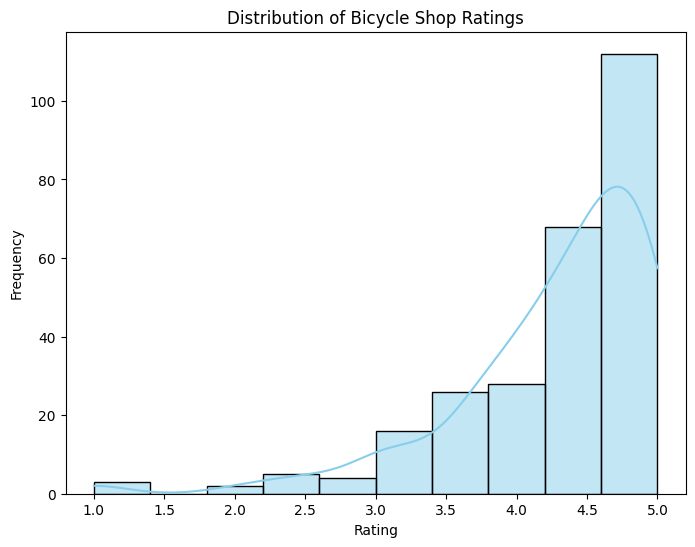

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of shop ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['rating'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of Bicycle Shop Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


## Review Count vs. Rating

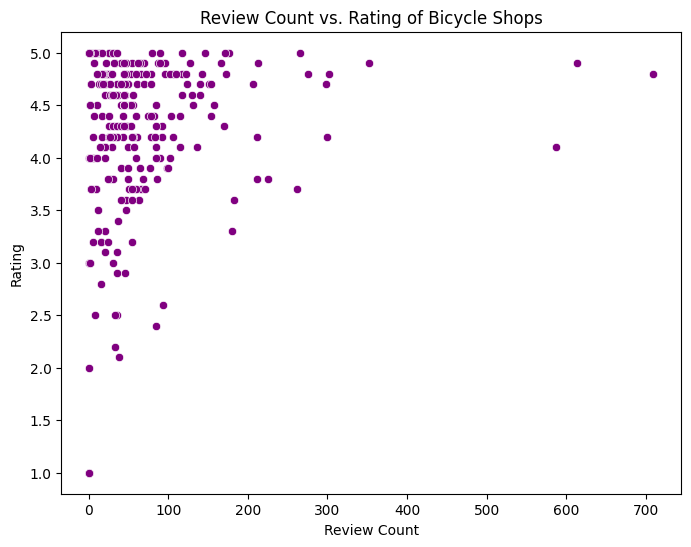

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='review_count', y='rating', data=df, color='purple')
plt.title('Review Count vs. Rating of Bicycle Shops')
plt.xlabel('Review Count')
plt.ylabel('Rating')
plt.show()


## Cycling Market Geospatial Distribution

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


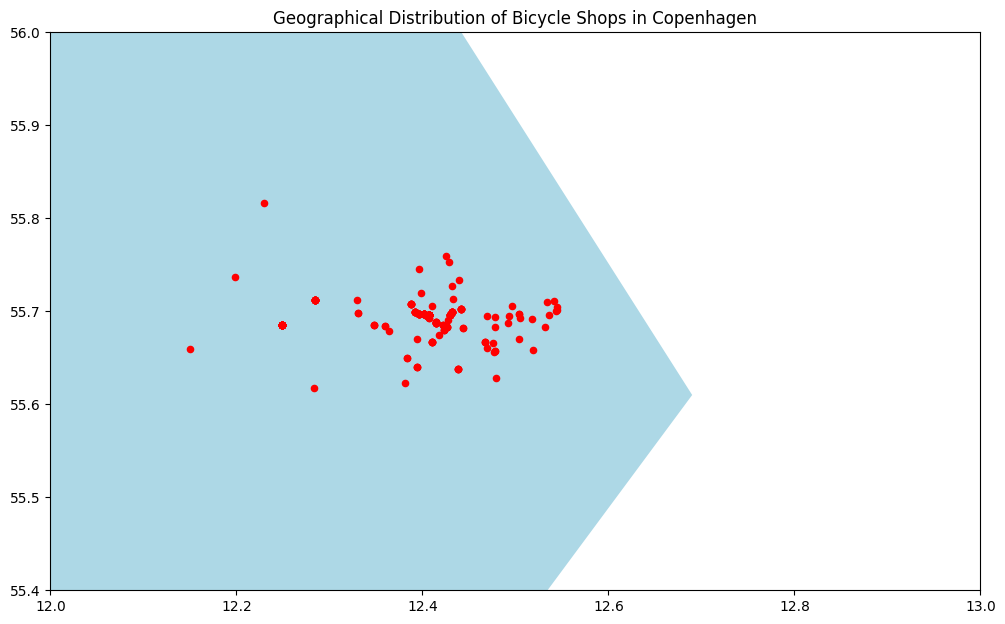

In [30]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Create GeoDataFrame from latitude and longitude
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# Load the shapefile for world map
world = gpd.read_file("C:/Users/HP/Downloads/ne_110m_admin_0_countries.shp")

# Check the column names to find the correct one for country names
print(world.columns)

# Filter Copenhagen (Denmark) from the world map using the correct column name
copenhagen = world[world['SOVEREIGNT'] == "Denmark"]  # Or use 'ADMIN' if that's the correct column

# Plot the shops
fig, ax = plt.subplots(figsize=(12, 12))  # Adjust the size if necessary
copenhagen.plot(ax=ax, color='lightblue')

# Adjust the zoom by modifying longitude and latitude range
ax.set_xlim([12.0, 13.0])  # Wider longitude range to zoom out
ax.set_ylim([55.4, 56.0])  # Wider latitude range to zoom out

geo_df.plot(ax=ax, color='red', markersize=20, label='Bicycle Shops')

plt.title('Geographical Distribution of Bicycle Shops in Copenhagen')
plt.show()


## Population Breakdown by Gender and Postal Code

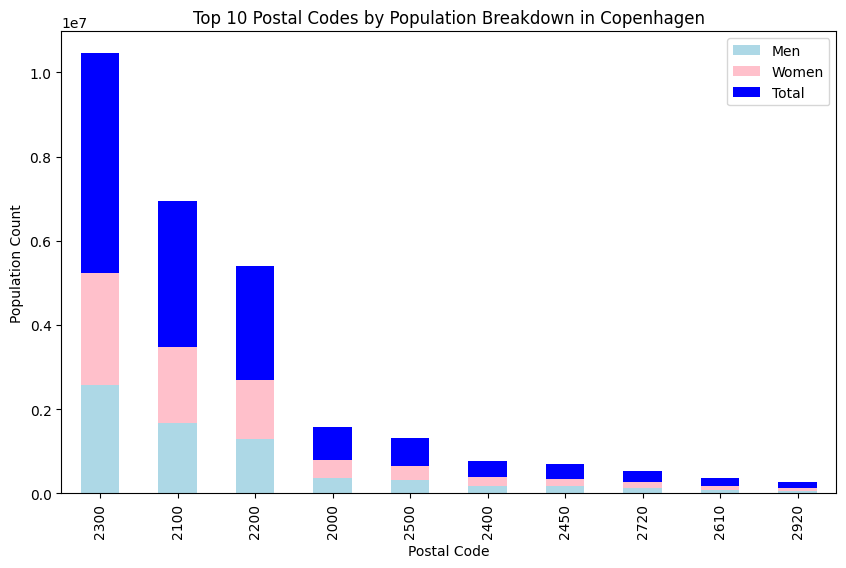

In [4]:
import matplotlib.pyplot as plt

# Grouping by postal code and summing the population by gender
population_data = df.groupby('postal_code')[['Men', 'Women']].sum()

# Sorting by the total population (sum of Men and Women) in descending order
population_data['Total'] = population_data['Men'] + population_data['Women']
population_data = population_data.sort_values('Total', ascending=False)

# Selecting the top N postal codes (for example, top 10)
top_n = 10
population_data_top_n = population_data.head(top_n)

# Plotting the data as a stacked bar plot
population_data_top_n.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'pink', 'blue'])

# Adding title and labels
plt.title(f'Top {top_n} Postal Codes by Population Breakdown in Copenhagen')
plt.xlabel('Postal Code')
plt.ylabel('Population Count')

# Display the plot
plt.show()


## Number of Shops per Postal Code

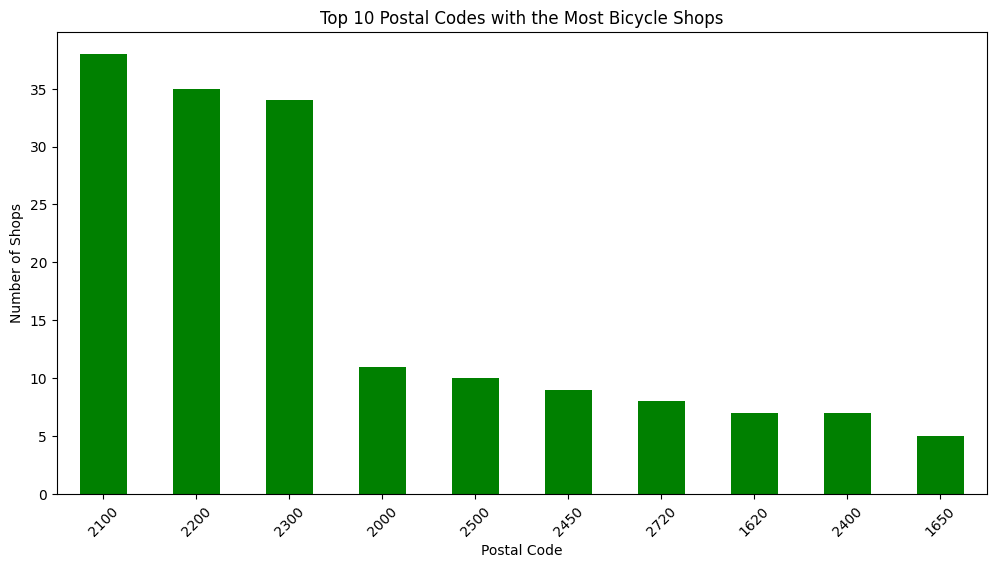

In [32]:
# Display only the top 10 postal codes
top_shops_per_postal_code = shops_per_postal_code.head(10)

# Plot the top 10 postal codes
fig, ax = plt.subplots(figsize=(12, 6))  # Increase figure size for better readability
top_shops_per_postal_code.plot(kind='bar', ax=ax, color='green')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)  # Rotate labels by 45 degrees (or 90 if needed)

# Set the title and labels
plt.title('Top 10 Postal Codes with the Most Bicycle Shops')
plt.xlabel('Postal Code')
plt.ylabel('Number of Shops')

# Show the plot
plt.show()


## Heatmap of Bicycle Shops (Geospatial Visualization)

In [33]:
import folium

# Create a base map centered around Copenhagen
map_copenhagen = folium.Map(location=[55.6761, 12.5683], zoom_start=12)

# Add bicycle shop markers
for _, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['name']} - {row['rating']} stars",
    ).add_to(map_copenhagen)

# Display the map
map_copenhagen


## Count of each category

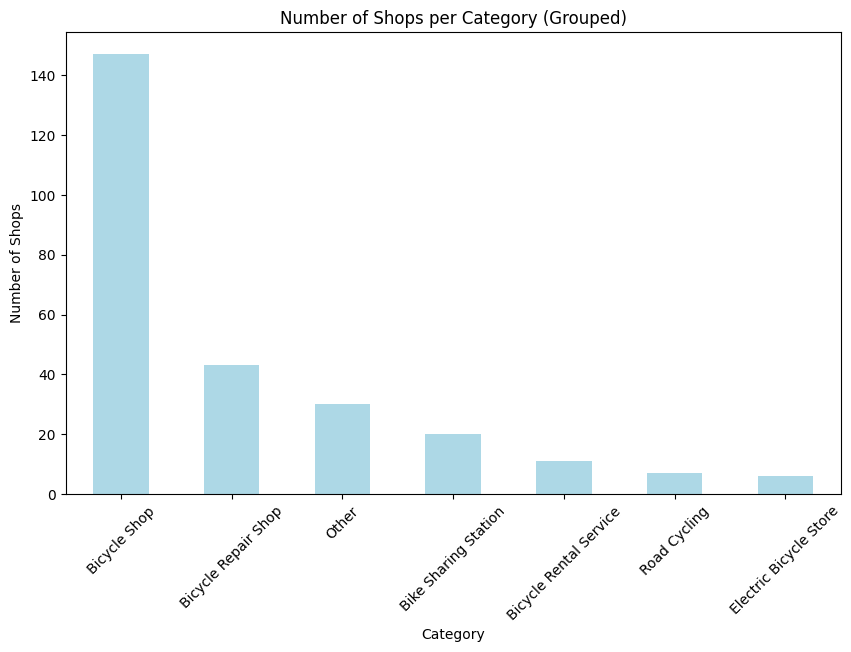

In [42]:
# Get the counts of each category
category_counts = df['category'].value_counts()

# Define a threshold for the number of shops to keep in each category
threshold = 5  # Adjust this based on your needs

# Filter categories that meet the threshold
popular_categories = category_counts[category_counts >= threshold].index

# Group categories that don't meet the threshold into "Other"
df['category'] = df['category'].apply(lambda x: x if x in popular_categories else 'Other')

# Plot the new distribution
category_counts = df['category'].value_counts()
category_counts.plot(kind='bar', figsize=(10, 6), color='lightblue')
plt.title('Number of Shops per Category (Grouped)')
plt.xlabel('Category')
plt.ylabel('Number of Shops')
plt.xticks(rotation=45)
plt.show()


## Gender Distribution by Area

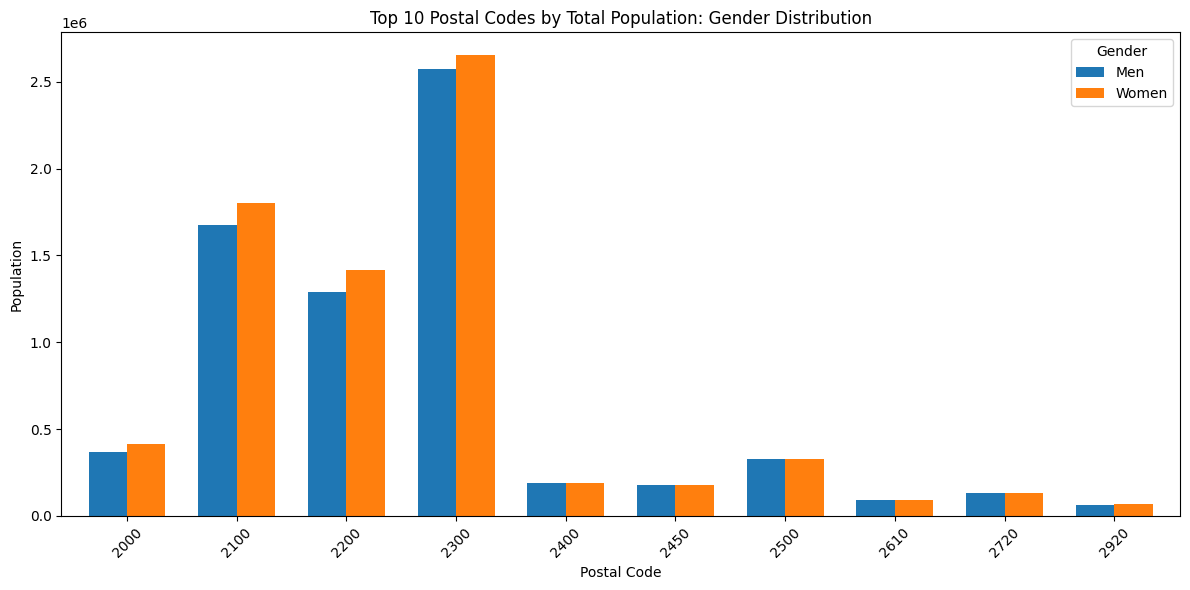

In [44]:


# Calculate total population per postal code
df['Total'] = df['Men'] + df['Women']
top10_postal = df.groupby('postal_code')['Total'].sum().nlargest(10).index

# Filter the DataFrame to only include those top 10 postal codes
top10_gender_dist = df[df['postal_code'].isin(top10_postal)].groupby('postal_code')[['Men', 'Women']].sum()

# Plotting
ax = top10_gender_dist.plot(kind='bar', figsize=(12, 6), width=0.7)
plt.title('Top 10 Postal Codes by Total Population: Gender Distribution')
plt.xlabel('Postal Code')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


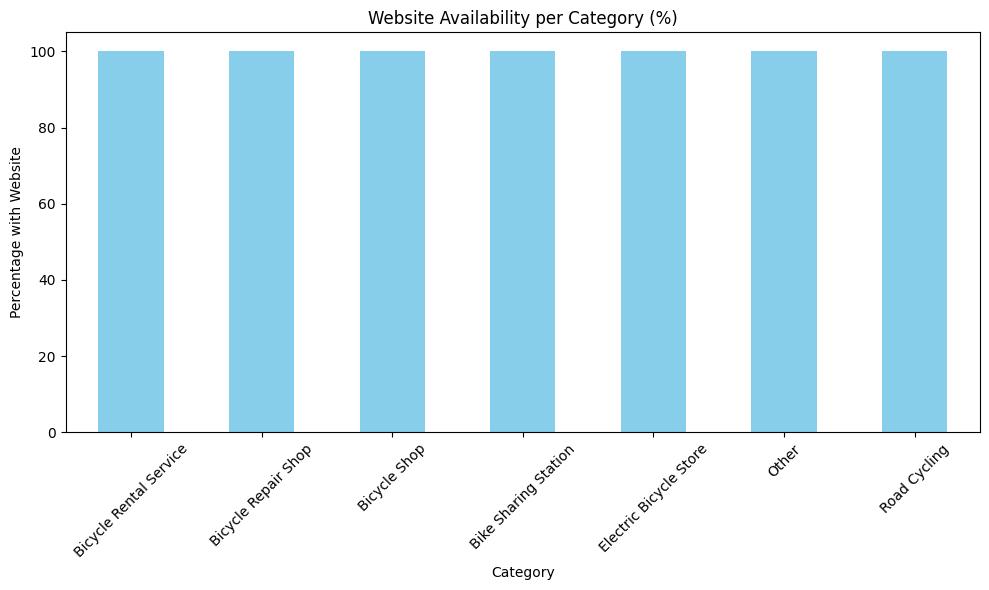

In [45]:


# Add a new column: 1 if website exists, else 0
df['has_website'] = df['website'].notna() & (df['website'].str.strip() != '')

# Group by category and count how many have websites
website_counts = df.groupby('category')['has_website'].sum()
total_counts = df['category'].value_counts()

# Calculate percentage of shops with websites in each category
website_percentage = (website_counts / total_counts * 100).sort_values(ascending=False)

# Plot
website_percentage.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Website Availability per Category (%)')
plt.ylabel('Percentage with Website')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Category Popularity by Review Count

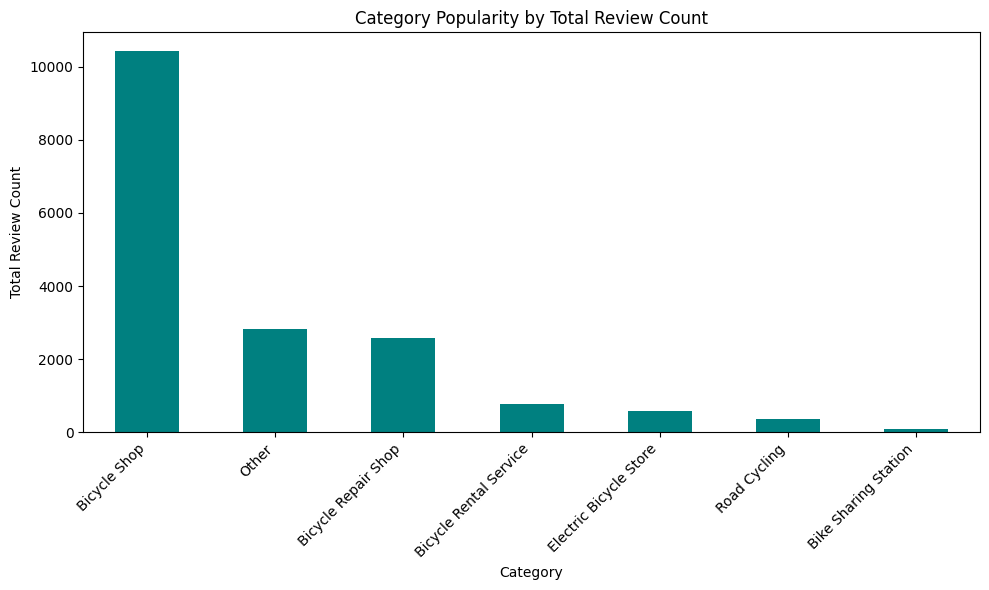

In [46]:
category_review_sum = df.groupby('category')['review_count'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
category_review_sum.plot(kind='bar', color='teal')
plt.title('Category Popularity by Total Review Count')
plt.xlabel('Category')
plt.ylabel('Total Review Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Linear Regression

C:\Users\HP\AppData\Local\Temp\ipykernel_15308\1526993147.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Training R²: 0.9999684323135316
Test R²: 0.9999964328176197


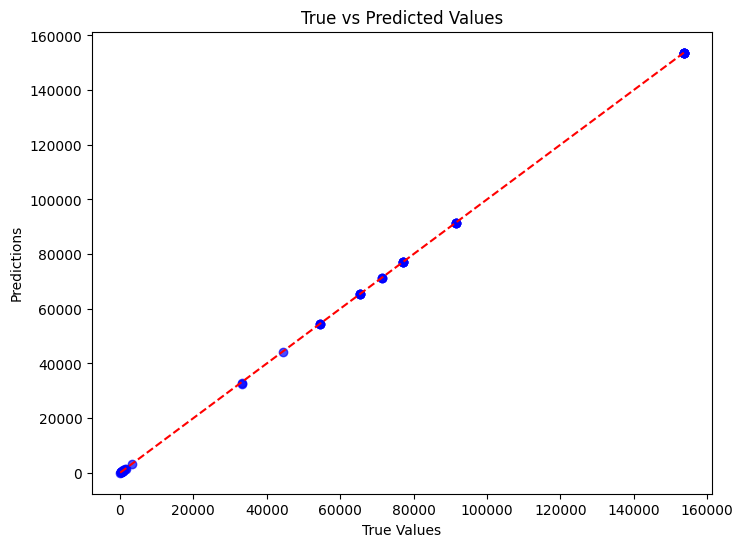

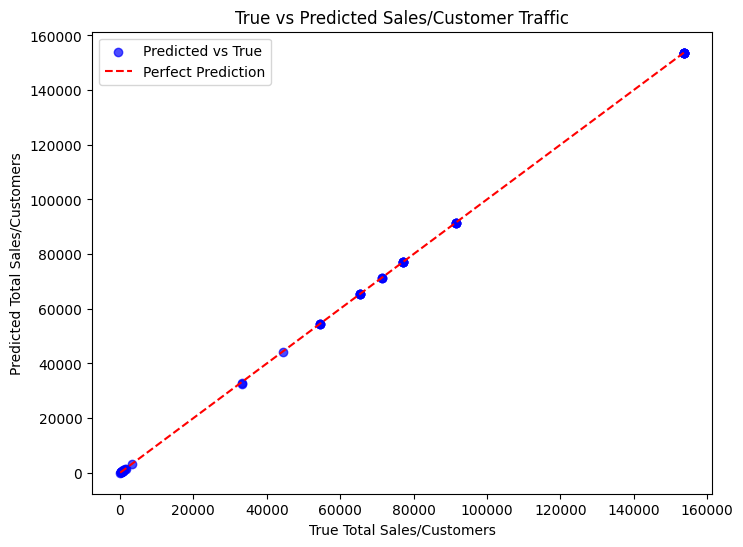

Predicted Total Sales/Customers for new data: 105.98


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# Assuming 'df' is already your dataframe, no need to recreate it
# If df is already loaded, you can skip this step

# Fill missing values (forward fill)
df.fillna(method='ffill', inplace=True)

# Create new feature based on rating (high_rating = 1 if rating >= 4.5 else 0)
df['high_rating'] = (df['rating'] >= 4.5).astype(int)

# Define target column and features
target_column = 'Total'  # You can change this to another column like 'rating' or 'Men'
X = df.drop(target_column, axis=1)
y = df[target_column]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: Define categorical and numerical columns
categorical_columns = ['category', 'Location', 'address']  # Add other categorical columns if needed
numerical_columns = ['rating', 'latitude', 'longitude', 'review_count', 'postal_code', 'Men', 'Women']

# Create a preprocessor for the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns)
    ])

# Create a pipeline with RandomForestRegressor
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Fit the model
model_pipeline.fit(X_train, y_train)

# Evaluate the model
train_score = model_pipeline.score(X_train, y_train)
test_score = model_pipeline.score(X_test, y_test)

print(f"Training R²: {train_score}")
print(f"Test R²: {test_score}")

import matplotlib.pyplot as plt

# Predict on test set
y_pred = model_pipeline.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs Predicted Values")
plt.show()
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Predicted vs True')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("True Total Sales/Customers")
plt.ylabel("Predicted Total Sales/Customers")
plt.title("True vs Predicted Sales/Customer Traffic")
plt.legend()
plt.show()


new_data = pd.DataFrame({
    'category': ['Bicycles'],
    'Location': ['Copenhagen'],
    'address': ['Street ABC'],
    'rating': [4.7],
    'latitude': [55.676],
    'longitude': [12.568],
    'review_count': [150],
    'postal_code': [1000],
    'Men': [60],
    'Women': [45]
})

# Predict for the new data
new_data_pred = model_pipeline.predict(new_data)

# Print the predicted result
print(f"Predicted Total Sales/Customers for new data: {new_data_pred[0]}")


## SVR Model

C:\Users\HP\AppData\Local\Temp\ipykernel_15308\109899841.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Training R² (SVR): -0.028303288922496117
Test R² (SVR): -0.009489699514324101


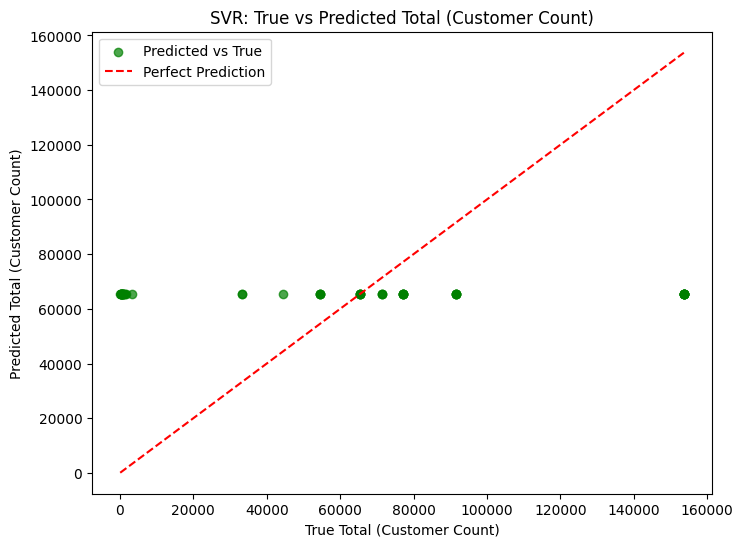

Predicted Total Customer Count for new data: [65488.78717153]


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Assuming 'df' is already your dataframe (with the data you provided)
# Fill missing values (forward fill)
df.fillna(method='ffill', inplace=True)

# Create new feature based on rating (high_rating = 1 if rating >= 4.5 else 0)
df['high_rating'] = (df['rating'] >= 4.5).astype(int)

# Define the target column and features
target_column = 'Total'  # In your dataset, Total = Men + Women (customer count)
X = df.drop(target_column, axis=1)
y = df[target_column]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define which columns are numerical and which are categorical
categorical_columns = ['category', 'Location', 'address']
numerical_columns = ['rating', 'latitude', 'longitude', 'review_count', 'postal_code', 'Men', 'Women']

# Create a preprocessor: scale numerical features and one-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns)
    ]
)

# Create a pipeline with Support Vector Regression (SVR)
model_svr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SVR(kernel='rbf'))  # 'rbf' kernel captures non-linear relationships
])

# Fit the SVR model
model_svr_pipeline.fit(X_train, y_train)

# Evaluate the model using the R² score
train_score_svr = model_svr_pipeline.score(X_train, y_train)
test_score_svr = model_svr_pipeline.score(X_test, y_test)
print(f"Training R² (SVR): {train_score_svr}")
print(f"Test R² (SVR): {test_score_svr}")

# Predict on the test set using SVR
y_pred_svr = model_svr_pipeline.predict(X_test)

# Visualize the predictions vs. true values for business interpretation:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_svr, color='green', alpha=0.7, label='Predicted vs True')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("True Total (Customer Count)")
plt.ylabel("Predicted Total (Customer Count)")
plt.title("SVR: True vs Predicted Total (Customer Count)")
plt.legend()
plt.show()

# Assume you have new unseen data to predict
new_data = pd.DataFrame({
    'category': ['Bicycles'],
    'Location': ['Copenhagen'],
    'address': ['Street ABC'],
    'rating': [4.7],
    'latitude': [55.676],
    'longitude': [12.568],
    'review_count': [100],
    'postal_code': [1000],
    'Men': [50],
    'Women': [40]
})

# Preprocess and predict
new_data_pred = model_svr_pipeline.predict(new_data)
print("Predicted Total Customer Count for new data:", new_data_pred)



## Random Forest

C:\Users\HP\AppData\Local\Temp\ipykernel_15308\71527157.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Training R²: 0.9999684323135316
Test R²: 0.9999964328176197


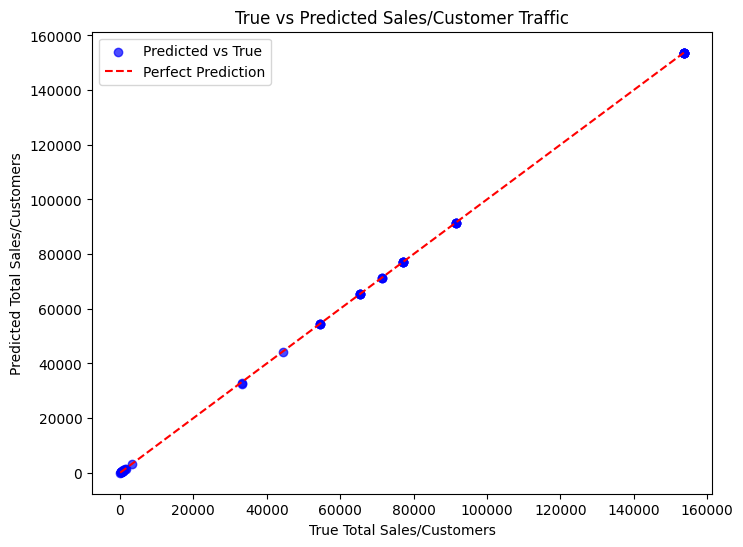

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Assuming 'df' is already your dataframe, no need to recreate it
# If df is already loaded, you can skip this step

# Fill missing values (forward fill)
df.fillna(method='ffill', inplace=True)

# Create new feature based on rating (high_rating = 1 if rating >= 4.5 else 0)
df['high_rating'] = (df['rating'] >= 4.5).astype(int)

# Define target column and features
target_column = 'Total'  # You can change this to another column like 'rating' or 'Men'
X = df.drop(target_column, axis=1)
y = df[target_column]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: Define categorical and numerical columns
categorical_columns = ['category', 'Location', 'address']  # Add other categorical columns if needed
numerical_columns = ['rating', 'latitude', 'longitude', 'review_count', 'postal_code', 'Men', 'Women']

# Create a preprocessor for the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns)
    ])

# Create a pipeline with RandomForestRegressor
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Fit the model
model_pipeline.fit(X_train, y_train)

# Evaluate the model
train_score = model_pipeline.score(X_train, y_train)
test_score = model_pipeline.score(X_test, y_test)

print(f"Training R²: {train_score}")
print(f"Test R²: {test_score}")

# Predict on test set
y_pred = model_pipeline.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Predicted vs True')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("True Total Sales/Customers")
plt.ylabel("Predicted Total Sales/Customers")
plt.title("True vs Predicted Sales/Customer Traffic")
plt.legend()
plt.show()
